In [3]:
import matplotlib.pyplot as plt

import pandas as pd 
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
import os

from statsmodels.tsa.arima.model import ARIMA
dirname = os.getcwd()


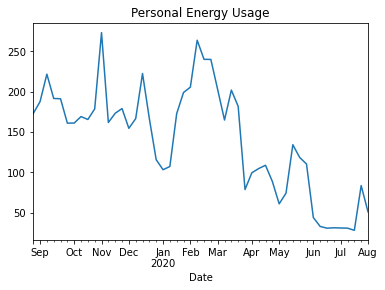

In [5]:
# My Personal Power Usage
filename = os.path.join(dirname, 'data.csv')
plt.title("Personal Energy Usage")
data = pd.read_csv(open(filename,'rb+'),index_col="Date")['Quantity']
data.index = pd.to_datetime(data.index, format='%m/%d/%Y')

#data = data.resample('W').sum()
data.resample('W').sum().plot()
data = data.to_frame()

<AxesSubplot:title={'center':'Weekly AEP demand'}, xlabel='Datetime'>

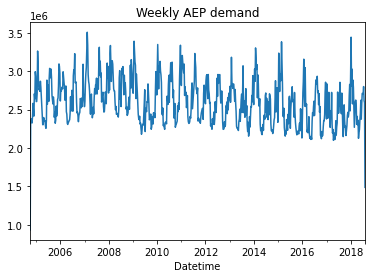

In [8]:
#Larger dataset for better analysis
plt.title("Weekly AEP demand")
data = pd.read_csv(open('AEP_hourly.csv','r'),index_col="Datetime")['AEP_MW']
data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M:%S')

data = data.resample('W').sum()
data.plot()


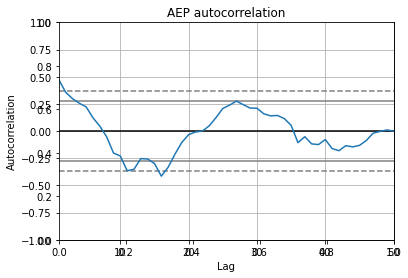

In [10]:
plt.title("AEP autocorrelation")
autocorrelation_plot(data[0:50])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                  723
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -9817.183
Date:                Sun, 27 Sep 2020   AIC                          19648.366
Time:                        16:41:45   BIC                          19680.441
Sample:                    10-03-2004   HQIC                         19660.747
                         - 08-05-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1814      0.023     -7.944      0.000      -0.226      -0.137
ar.L2         -0.1337      0.031     -4.377      0.000      -0.194      -0.074
ar.L3          0.0086      0.036      0.240      0.8

<AxesSubplot:xlabel='Datetime'>

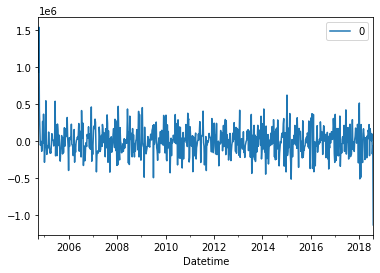

In [12]:
# fit model
model = ARIMA(data, order=(6,1,0))
model_fit = model.fit()

#Summary
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:title={'center':'Personal Weekly demand'}, xlabel='Date'>

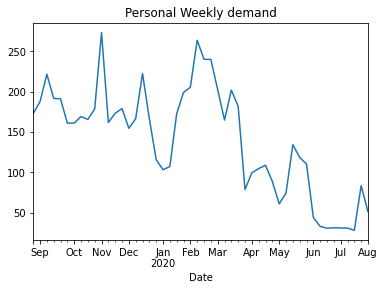

In [15]:
#Larger dataset for better analysis
plt.title("Personal Weekly demand")
data = pd.read_csv(open('data.csv','r'),index_col="Date")['Quantity']
data.index = pd.to_datetime(data.index, format='%m/%d/%Y')
data = data.resample('W').sum()
data.plot()


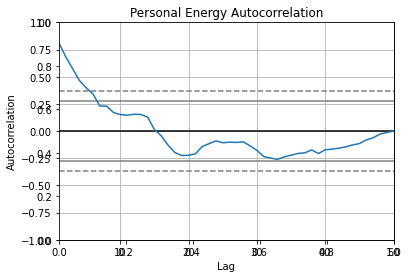

In [18]:
plt.title("Personal Energy Autocorrelation")
autocorrelation_plot(data)
plt.show()

In [21]:

X = data.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=198.147957, expected=240.009000
predicted=201.411175, expected=239.889000
predicted=238.192970, expected=202.482000
predicted=197.755912, expected=164.761000
predicted=171.877475, expected=201.865000
predicted=211.297343, expected=181.720000
predicted=200.163749, expected=78.590000
predicted=123.243132, expected=99.355000
predicted=107.999695, expected=104.596000
predicted=92.990179, expected=108.658000
predicted=136.496451, expected=88.591000
predicted=101.287997, expected=60.828000
predicted=55.879087, expected=74.084000
predicted=77.447094, expected=134.140000
predicted=124.594359, expected=118.364000
predicted=113.549092, expected=110.227000
predicted=111.762244, expected=43.847000
predicted=45.441828, expected=32.814000
predicted=51.091951, expected=30.663000
predicted=47.106364, expected=31.154000
predicted=41.092670, expected=30.905000
predicted=34.419557, expected=30.716000
predicted=23.687929, expected=28.008000
predicted=27.230630, expected=83.489000
predicted=75.05

NameError: name 'pyplot' is not defined